# DAY 35

仍然是循序渐进，从基础的开始，逐渐加大深度。先回顾下之前的内容

使用设备: cuda:0
Epoch [100/20000], Loss: 1.1077
Epoch [200/20000], Loss: 1.0958
Epoch [200/20000], Loss: 1.0958
Epoch [300/20000], Loss: 1.0863
Epoch [400/20000], Loss: 1.0740
Epoch [400/20000], Loss: 1.0740
Epoch [500/20000], Loss: 1.0543
Epoch [600/20000], Loss: 1.0207
Epoch [600/20000], Loss: 1.0207
Epoch [700/20000], Loss: 0.9698
Epoch [800/20000], Loss: 0.9146
Epoch [800/20000], Loss: 0.9146
Epoch [900/20000], Loss: 0.8530
Epoch [1000/20000], Loss: 0.7882
Epoch [1000/20000], Loss: 0.7882
Epoch [1100/20000], Loss: 0.7237
Epoch [1200/20000], Loss: 0.6660
Epoch [1200/20000], Loss: 0.6660
Epoch [1300/20000], Loss: 0.6155
Epoch [1400/20000], Loss: 0.5723
Epoch [1400/20000], Loss: 0.5723
Epoch [1500/20000], Loss: 0.5356
Epoch [1600/20000], Loss: 0.5045
Epoch [1600/20000], Loss: 0.5045
Epoch [1700/20000], Loss: 0.4777
Epoch [1800/20000], Loss: 0.4544
Epoch [1800/20000], Loss: 0.4544
Epoch [1900/20000], Loss: 0.4338
Epoch [2000/20000], Loss: 0.4153
Epoch [2000/20000], Loss: 0.4153
Epoch [210

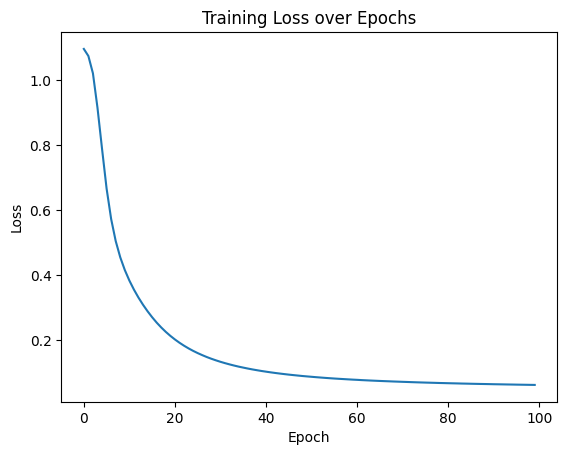

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

# 设置GPU设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 归一化数据
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将数据转换为PyTorch张量并移至GPU
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型并移至GPU
model = MLP().to(device)

# 分类问题使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 使用随机梯度下降优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 20000  # 训练的轮数

# 用于存储每100个epoch的损失值和对应的epoch数
losses = []

start_time = time.time()  # 记录开始时间

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)  # 隐式调用forward函数
    loss = criterion(outputs, y_train)

    # 反向传播和优化
    optimizer.zero_grad() #梯度清零，因为PyTorch会累积梯度，所以每次迭代需要清零，梯度累计是那种小的bitchsize模拟大的bitchsize
    loss.backward() #  反向传播计算梯度
    optimizer.step() # 更新参数

    # 记录损失值
    if (epoch + 1) % 200 == 0:
        losses.append(loss.item()) # item()方法返回一个Python数值，loss是一个标量张量
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # 打印训练信息
    if (epoch + 1) % 100 == 0: # range是从0开始，所以epoch+1是从当前epoch开始，每100个epoch打印一次
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

time_all = time.time() - start_time  # 计算训练时间
print(f'Training time: {time_all:.2f} seconds')


# 可视化损失曲线
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

模型的推理
进度条功能
模型保存和加载

## 一、模型结构可视化


理解一个深度学习网络最重要的2点：
1. 了解损失如何定义的，知道损失从何而来----把抽象的任务通过损失函数量化出来
2. 了解参数总量，即知道每一层的设计才能退出---层设计决定参数总量

为了了解参数总量，我们需要知道层设计，以及每一层参数的数量。下面介绍1几个层可视化工具：

### 1.1 nn.model自带的方法

In [27]:
#  nn.Module 的内置功能，直接输出模型结构
print(model)

MLP(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)


这是最基础、最简单的方法，直接打印模型对象，它会输出模型的结构，显示模型中各个层的名称和参数信息

In [28]:
# nn.Module 的内置功能，返回模型的可训练参数迭代器
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: fc1.weight, Shape: torch.Size([10, 4])
Parameter name: fc1.bias, Shape: torch.Size([10])
Parameter name: fc2.weight, Shape: torch.Size([3, 10])
Parameter name: fc2.bias, Shape: torch.Size([3])


可以将模型中带有weight的参数（即权重）提取出来，并转为 numpy 数组形式，对其计算统计分布，并且绘制可视化图表

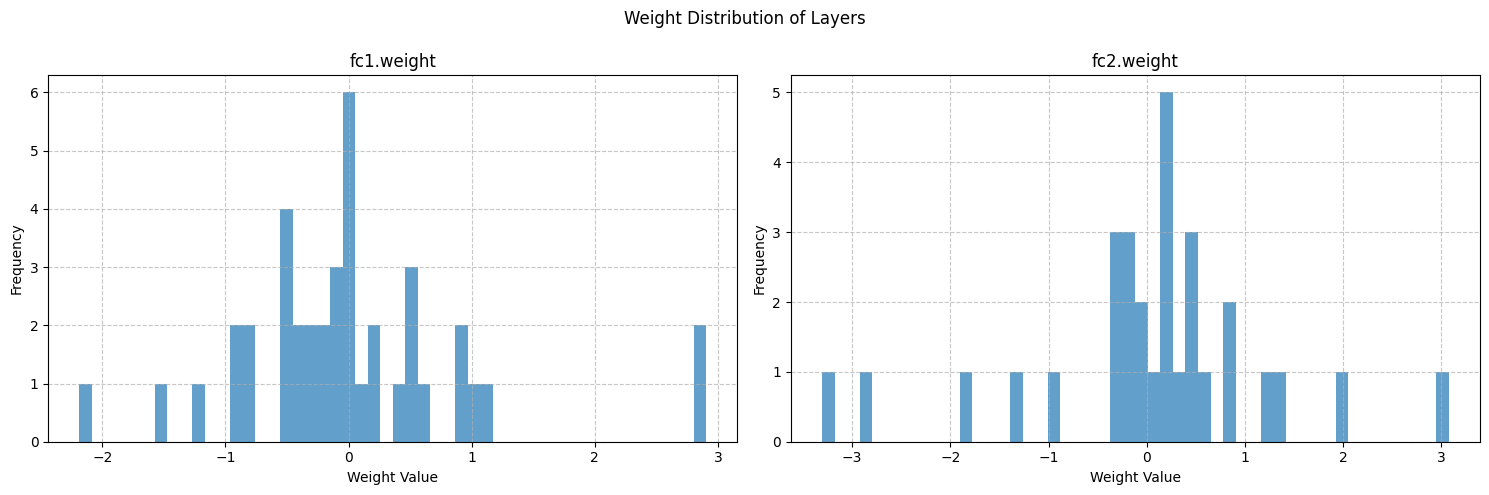


=== 权重统计信息 ===
fc1.weight:
  均值: 0.013520
  标准差: 0.935024
  最小值: -2.185144
  最大值: 2.903806
------------------------------
fc2.weight:
  均值: 0.027174
  标准差: 1.232366
  最小值: -3.307564
  最大值: 3.074636
------------------------------


In [31]:
# 提取权重数据
import numpy as np
weight_data = {}
for name, param in model.named_parameters():
    if 'weight' in name:
        weight_data[name] = param.detach().cpu().numpy()

# 可视化权重分布
fig, axes = plt.subplots(1, len(weight_data), figsize=(15, 5))
fig.suptitle('Weight Distribution of Layers')

for i, (name, weights) in enumerate(weight_data.items()):
    # 展平权重张量为一维数组
    weights_flat = weights.flatten()
    
    # 绘制直方图
    axes[i].hist(weights_flat, bins=50, alpha=0.7)
    axes[i].set_title(name)
    axes[i].set_xlabel('Weight Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 计算并打印每层权重的统计信息
print("\n=== 权重统计信息 ===")
for name, weights in weight_data.items():
    mean = np.mean(weights)
    std = np.std(weights)
    min_val = np.min(weights)
    max_val = np.max(weights)
    print(f"{name}:")
    print(f"  均值: {mean:.6f}")
    print(f"  标准差: {std:.6f}")
    print(f"  最小值: {min_val:.6f}")
    print(f"  最大值: {max_val:.6f}")
    print("-" * 30)

对比 fc1.weight 和 fc2.weight 的统计信息 ，可以发现它们的均值、标准差、最值等存在差异。这反映了不同层在模型中的作用不同。

权重统计信息可以为超参数调整提供参考。例如，如果发现权重标准差过大导致训练不稳定，可以尝试调整学习率，使权重更新更平稳；或者改变权重初始化方法，使初始权重分布更合理。如果最小值和最大值在训练后期仍波动较大，可能需要考虑调整正则化参数，防止过拟合或欠拟合。

### 1.2 torchsummary库的summary方法

In [15]:
# pip install torchsummary -i https://pypi.tuna.tsinghua.edu.cn/simple

In [16]:
from torchsummary import summary
# 打印模型摘要，可以放置在模型定义后面
summary(model, input_size=(4,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              50
              ReLU-2                   [-1, 10]               0
            Linear-3                    [-1, 3]              33
Total params: 83
Trainable params: 83
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


该方法不显示输入层的尺寸，因为输入的神经网是自己设置的，所以不需要显示输入层的尺寸。
但是在使用该方法时，input_size=(4,) 参数是必需的，因为 PyTorch 需要知道输入数据的形状才能推断模型各层的输出形状和参数数量。

这是因为PyTorch 的模型在定义时是动态的，它不会预先知道输入数据的具体形状。nn.Linear(4, 10) 只定义了 “输入维度是 4，输出维度是 10”，但不知道输入的批量大小和其他维度，比如卷积层需要知道输入的通道数、高度、宽度等信息。----并非所有输入数据都是结构化数据

因此，要生成模型摘要（如每层的输出形状、参数数量），必须提供一个示例输入形状，让 PyTorch “运行” 一次模型，从而推断出各层的信息。

summary 函数的核心逻辑是：
1. 创建一个与 input_size 形状匹配的虚拟输入张量（通常填充零）
2. 将虚拟输入传递给模型，执行一次前向传播（但不计算梯度）
3. 记录每一层的输入和输出形状，以及参数数量
4. 生成可读的摘要报告


不同场景下的 `input_size` 示例
| 模型类型       | 输入类型               | `input_size` 示例         | 实际输入形状（batch_size=32） |
|----------------|------------------------|--------------------------|-----------------------------|
| MLP（单样本）  | 一维特征向量           | `(4,)`                   | `(32, 4)`                   |
| CNN（图像）    | 三维图像（C,H,W）      | `(3, 224, 224)`          | `(32, 3, 224, 224)`         |
| RNN（序列）    | 二维序列（seq_len, feat） | `(10, 5)`               | `(32, 10, 5)`               |




其中最开始的参数的值是默认初始化的，初始化有很多方法，后面接触到复杂的模型再提

构建神经网络的时候

1. 输入层不需要写：x多少个特征 输入层就有多少神经元
2. 隐藏层需要写，从第一个隐藏层可以看出特征的个数
3. 输出层的神经元和任务有关，比如分类任务，输出层有3个神经元，一个对应每个类别 


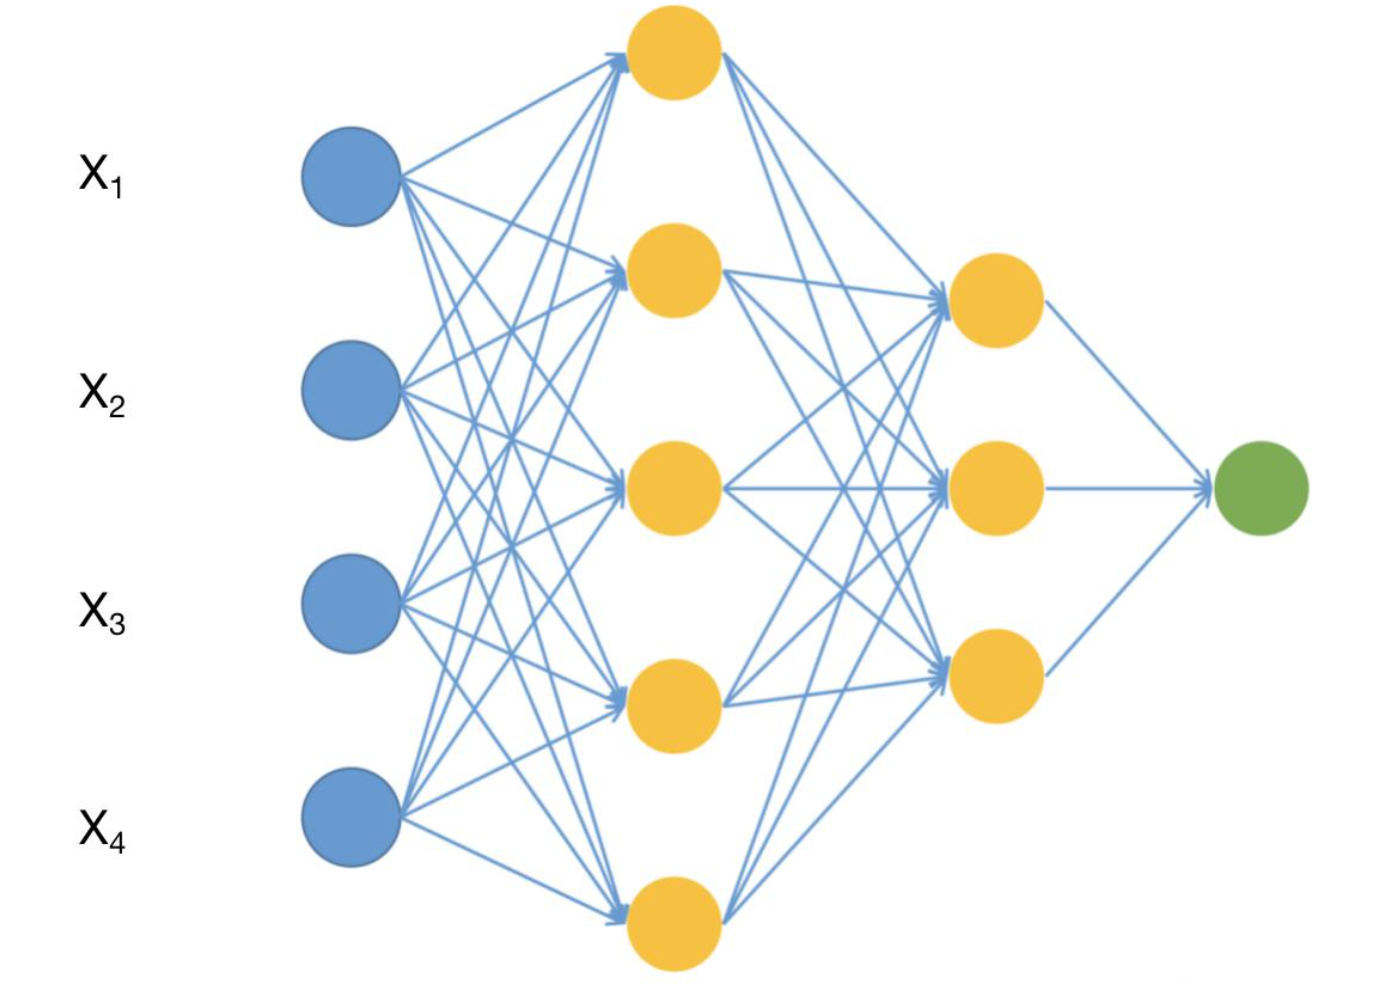

上图只是帮助你理解，和上述架构不同，每条线记录权重w，在每个神经元内计算并且输出Relu(w*x+b)

可以看做，线记录权重，神经元记录偏置和损失函数

可学习参数计算
1. Linear-1对应self.fc1 = nn.Linear(4, 10)，表明前一层有4个神经元，这一层有10个神经元，每2个神经元之间靠着线相连，所有有4*10个权重参数+10个偏置参数=50个参数
2. relu层不涉及可学习参数，可以把它和前一个线性层看成一层，图上也是这个含义
3. Linear-3层对应代码 self.fc2 = nn.Linear(10,3),10*3个权重参数+3个偏置=33个参数

总参数83个，占用内存几乎为0




### 1.3 torchinfo库的summary方法

torchinfo 是提供比 torchsummary 更详细的模型摘要信息，包括每层的输入输出形状、参数数量、计算量等。

In [17]:
# pip install torchinfo -i https://pypi.tuna.tsinghua.edu.cn/simple


In [18]:
from torchinfo import summary
summary(model, input_size=(4, ))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [3]                       --
├─Linear: 1-1                            [10]                      50
├─ReLU: 1-2                              [10]                      --
├─Linear: 1-3                            [3]                       33
Total params: 83
Trainable params: 83
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

torchinfo这个库常常和tensorboard一起使用，我们后面会介绍

## 二、 进度条功能

我们介绍下tqdm这个库，他非常适合用在循环中观察进度。尤其在深度学习这种训练是循环的场景中。他最核心的逻辑如下
1. 创建一个进度条对象，并传入总迭代次数。一般用with语句创建对象，这样对象会在with语句结束后自动销毁，保证资源释放。with是常见的上下文管理器，这样的使用方式还有用with打开文件，结束后会自动关闭文件。

2. 更新进度条，通过pbar.update(n)指定每次前进的步数n（适用于非固定步长的循环）。


### 2.1 手动更新

In [19]:
from tqdm import tqdm  # 先导入tqdm库
import time  # 用于模拟耗时操作

# 创建一个总步数为10的进度条
with tqdm(total=10) as pbar:  # pbar是进度条对象的变量名
    # pbar 是 progress bar（进度条）的缩写，约定俗成的命名习惯。
    for i in range(10):  # 循环10次（对应进度条的10步）
        time.sleep(0.5)  # 模拟每次循环耗时0.5秒
        pbar.update(1)  # 每次循环后，进度条前进1步

100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


In [20]:
from tqdm import tqdm
import time

# 创建进度条时添加描述（desc）和单位（unit）
with tqdm(total=5, desc="下载文件", unit="个") as pbar:
    # 进度条这个对象，可以设置描述和单位
    # desc是描述，在左侧显示
    # unit是单位，在进度条右侧显示
    for i in range(5):
        time.sleep(1)
        pbar.update(1)  # 每次循环进度+1

下载文件: 100%|██████████| 5/5 [00:05<00:00,  1.01s/个]


unit 参数的核心作用是明确进度条中每个进度单位的含义，使可视化信息更具可读性。在深度学习训练中，常用的单位包括：

- epoch：训练轮次（遍历整个数据集一次）。
- batch：批次（每次梯度更新处理的样本组）。
- sample：样本（单个数据点）

### 2.2 自动更新

In [21]:
from tqdm import tqdm
import time

# 直接将range(3)传给tqdm，自动生成进度条
# 这个写法我觉得是有点神奇的，直接可以给这个对象内部传入一个可迭代对象，然后自动生成进度条
for i in tqdm(range(3), desc="处理任务", unit="epoch"):
    time.sleep(1)


处理任务: 100%|██████████| 3/3 [00:03<00:00,  1.01s/epoch]


for i in tqdm(range(3), desc="处理任务", unit="个")这个写法则不需要在循环中调用update()方法，更加简洁

实际上这2种写法都随意选取，这里都介绍下

In [22]:
# 用tqdm的set_postfix方法在进度条右侧显示实时数据（如当前循环的数值、计算结果等）：
from tqdm import tqdm
import time

total = 0  # 初始化总和
with tqdm(total=10, desc="累加进度") as pbar:
    for i in range(1, 11):
        time.sleep(0.3)
        total += i  # 累加1+2+3+...+10
        pbar.update(1)  # 进度+1
        pbar.set_postfix({"当前总和": total})  # 显示实时总和

累加进度: 100%|██████████| 10/10 [00:03<00:00,  3.22it/s, 当前总和=55]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from tqdm import tqdm  # 导入tqdm库用于进度条显示

# 设置GPU设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 归一化数据
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将数据转换为PyTorch张量并移至GPU
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型并移至GPU
model = MLP().to(device)

# 分类问题使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 使用随机梯度下降优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 20000  # 训练的轮数

# 用于存储每100个epoch的损失值和对应的epoch数
losses = []
epochs = []

start_time = time.time()  # 记录开始时间

# 创建tqdm进度条
with tqdm(total=num_epochs, desc="训练进度", unit="epoch") as pbar:
    # 训练模型
    for epoch in range(num_epochs):
        # 前向传播
        outputs = model(X_train)  # 隐式调用forward函数
        loss = criterion(outputs, y_train)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 记录损失值并更新进度条
        if (epoch + 1) % 200 == 0:
            losses.append(loss.item())
            epochs.append(epoch + 1)
            # 更新进度条的描述信息
            pbar.set_postfix({'Loss': f'{loss.item():.4f}'})

        # 每1000个epoch更新一次进度条
        if (epoch + 1) % 1000 == 0:
            pbar.update(1000)  # 更新进度条

    # 确保进度条达到100%
    if pbar.n < num_epochs:
        pbar.update(num_epochs - pbar.n)  # 计算剩余的进度并更新

time_all = time.time() - start_time  # 计算训练时间
print(f'Training time: {time_all:.2f} seconds')

# # 可视化损失曲线
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, losses)
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss over Epochs')
# plt.grid(True)
# plt.show()


使用设备: cuda:0


训练进度: 100%|██████████| 20000/20000 [00:10<00:00, 1885.37epoch/s, Loss=0.0630]

Training time: 10.61 seconds


## 三、 模型的推理

之前我们说完了训练模型，那么现在我们来测试模型。测试这个词在大模型领域叫做推理（inference），意味着把数据输入到训练好的模型的过程。

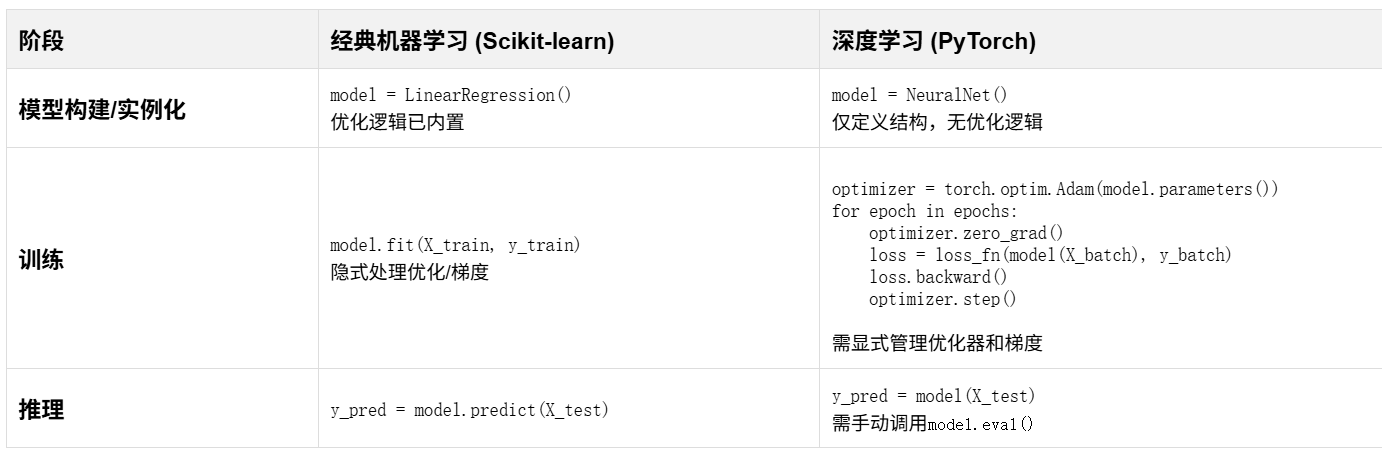

注意 损失和优化器在训练阶段。

In [24]:
# 在测试集上评估模型，此时model内部已经是训练好的参数了
# 评估模型
model.eval() # 设置模型为评估模式
with torch.no_grad(): # torch.no_grad()的作用是禁用梯度计算，可以提高模型推理速度
    outputs = model(X_test)  # 对测试数据进行前向传播，获得预测结果
    _, predicted = torch.max(outputs, 1) # torch.max(outputs, 1)返回每行的最大值和对应的索引
    #这个函数返回2个值，分别是最大值和对应索引，参数1是在第1维度（行）上找最大值，_ 是Python的约定，表示忽略这个返回值，所以这个写法是找到每一行最大值的下标
    # 此时outputs是一个tensor，p每一行是一个样本，每一行有3个值，分别是属于3个类别的概率，取最大值的下标就是预测的类别


    # predicted == y_test判断预测值和真实值是否相等，返回一个tensor，1表示相等，0表示不等，然后求和，再除以y_test.size(0)得到准确率
    # 因为这个时候数据是tensor，所以需要用item()方法将tensor转化为Python的标量
    # 之所以不用sklearn的accuracy_score函数，是因为这个函数是在CPU上运行的，需要将数据转移到CPU上，这样会慢一些
    # size(0)获取第0维的长度，即样本数量

    correct = (predicted == y_test).sum().item() # 计算预测正确的样本数
    accuracy = correct / y_test.size(0)
    print(f'测试集准确率: {accuracy * 100:.2f}%')

测试集准确率: 96.67%


模型的评估模式简单来说就是评估阶段会关闭一些训练相关的操作和策略 ，比如更新参数 正则化等操作，确保模型输出结果的稳定性和一致性。

可能有同学好奇，为什么评估模式不关闭梯度计算，推理不是不需要更新参数么？

主要还是因为在某些场景下，评估阶段可能需要计算梯度（虽然不更新参数）。例如：计算梯度用于可视化（如 CAM 热力图，主要用于cnn相关）。所以为了避免这种需求不被满足，还是需要手动关闭梯度计算。